# INFORMACIÓN DEL PROYECTO

### VACACIONES TOP: PLAN DE EXPANSIÓN

Vacaciones Top es una empresa turistica española que quiere ampliar su mercado: ellos creen que añadir bases en rutas populares para los vuelos procedentes de Estados Unidos puede ser buena inversión.
Quieren saber donde abrir su proxima oficina.

### HIPÓTESIS

**1. La meta más popular es una capital europea.**  
**2. La mayor parte de los vuelos tiene como destino Europa y Asia.**         
**3. La estación del año con más frecuencia de vuelos es el verano.**  

## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

El dataset se llama U.S. International Air Traffic data(1990-2020) y recoge los datos de todos los vuelos procedientes de Estados Unidos con la informacion de pasajeros.

Int_Departures = Datos de todos los vuelos de US a non-US, con su respectivo origen y destino.

Pax = Datos de numero total de pasajeros por **cada mes** y año, con su respectivo origen y destino. 

links: https://www.kaggle.com/datasets/parulpandey/us-international-air-traffic-data/code

https://www.opendatanetwork.com/dataset/data.transportation.gov/xgub-n9bw

https://data.opendatasoft.com/explore/dataset/airports-code%40public/export/

https://dev.socrata.com/foundry/data.transportation.gov/xgub-n9bw

**PREPARACIÓN DE DATOS**

In [1]:
#importamos las librerias necesarias y leemos los datos
import folium
import json
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df1 = pd.read_csv('International_Departures.csv')
paxd = pd.read_csv('International_Pax.csv')


In [2]:
# Primer dataset vuelos--
#primero renombramos las columnas para que sean más legibles
df1 = df1.rename(columns={'usg_apt_id': 'us_airport_id',
                   'usg_apt': 'us_airport_name',
                   'usg_wac': 'us_world_area_code',
                   'fg_apt_id': 'destination_airport_id',
                   'fg_apt': 'destination_airport_name',
                   'fg_wac': 'destination_world_area_code'})
df1.head()

,data_dte,Year,Month,us_airport_id,us_airport_name,us_world_area_code,destination_airport_id,destination_airport_name,destination_world_area_code,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2006,2006,5,12016,GUM,5,13162,MAJ,844,20177,PFQ,1,Departures,0,10,10
1,05/01/2003,2003,5,10299,ANC,1,13856,OKO,736,20007,5Y,1,Departures,0,15,15
2,03/01/2007,2007,3,10721,BOS,13,12651,KEF,439,20402,GL,1,Departures,0,1,1
3,12/01/2004,2004,12,11259,DAL,74,16271,YYZ,936,20201,AMQ,1,Departures,0,1,1
4,05/01/2009,2009,5,13303,MIA,33,11075,CMW,219,21323,5L,0,Departures,0,20,20


In [3]:
# Segundo dataset pasajeros--
paxd = paxd.rename(columns={'usg_apt_id': 'us_airport_id',
                   'usg_apt': 'us_airport_name',
                   'usg_wac': 'us_world_area_code',
                   'fg_apt_id': 'destination_airport_id',
                   'fg_apt': 'destination_airport_name',
                   'fg_wac': 'destination_world_area_code'})
paxd.head()

,data_dte,Year,Month,us_airport_id,us_airport_name,us_world_area_code,destination_airport_id,destination_airport_name,destination_world_area_code,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,0,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683
2,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,1,Passengers,0,1010,1010
3,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,1,Passengers,0,508,508
4,12/01/2005,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,1,Passengers,0,76,76


In [4]:
# Filtro 2020 porque solo tiene enero
df1 = df1.copy().loc[df1['Year']!=2020]
# carriergroup es la empresa que maneja el vuelo entonces le asignamos domestic or foreign
df1['carriergroup'] = df1['carriergroup'].replace({1: 'domestic', 0: 'foreign'})
df1['data_dte'] = pd.to_datetime(df1['data_dte'])
df1=df1.sort_values(by=['Year', 'Month']).reset_index()
df1.drop("index", axis=1, inplace=True)

In [5]:
#ahora trabajo con el segundo dataframe de pasajeros
# Filtro 2020
paxd = paxd.copy().loc[paxd['Year']!=2020]
# explicito carrier group
paxd['carriergroup'] = paxd['carriergroup'].replace({1: 'domestic', 0: 'foreign'})
paxd.head()

,data_dte,Year,Month,us_airport_id,us_airport_name,us_world_area_code,destination_airport_id,destination_airport_name,destination_world_area_code,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,05/01/2014,2014,5,14492,RDU,36,11032,CUN,148,19534,AM,foreign,Passengers,0,315,315
1,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,foreign,Passengers,0,683,683
2,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,domestic,Passengers,0,1010,1010
3,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,domestic,Passengers,0,508,508
4,12/01/2005,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,domestic,Passengers,0,76,76


In [6]:
#Ordeno por fecha los vuelos
paxd['data_dte'] = pd.to_datetime(paxd['data_dte'])
paxd= paxd.sort_values(by=['Year', 'Month']).reset_index()
paxd.drop("index", axis=1, inplace=True)
paxd.head()

,data_dte,Year,Month,us_airport_id,us_airport_name,us_world_area_code,destination_airport_id,destination_airport_name,destination_world_area_code,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,1990-01-01,1990,1,11042,CLE,44,11032,CUN,148,19892,ACQ,foreign,Passengers,0,796,796
1,1990-01-01,1990,1,12264,IAD,38,14739,SDQ,224,20312,TZ,domestic,Passengers,0,191,191
2,1990-01-01,1990,1,11697,FLL,33,11760,FRA,429,20120,DFQ,foreign,Passengers,0,1258,1258
3,1990-01-01,1990,1,11252,DAB,33,16217,YUL,941,19506,ND,foreign,Passengers,0,237,237
4,1990-01-01,1990,1,14107,PHX,81,11032,CUN,148,19892,ACQ,foreign,Passengers,0,513,513


In [7]:
# numero tot. vuelos por año
df1_year = df1.groupby('Year')['Total'].sum()
df1_year = df1_year.to_frame().reset_index()
df1_year.head()

,Year,Total
0,1990,683399
1,1991,701843
2,1992,784967
3,1993,820376
4,1994,844760


In [8]:
# numero tot. pasajeros por año 
pax_year = paxd.groupby('Year')['Total'].sum()
pax_year = pax_year.to_frame().reset_index()
pax_year.head()

,Year,Total
0,1990,84425428
1,1991,81771514
2,1992,89642833
3,1993,94140075
4,1994,98550584


**VISUALIZACIÓN DE DATOS**

En este grafico vemos dos anomalías en la tendencia ascendente que pueden ser explicadas por el accidente del 9/11 y la crisis economica del 2008 pero, en ambos casos, la tendencia vuelve en un par de años.

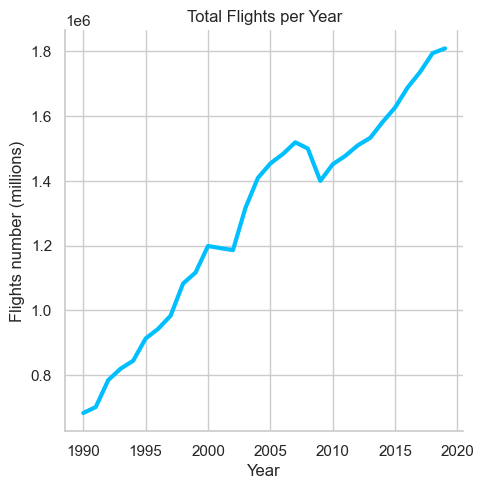

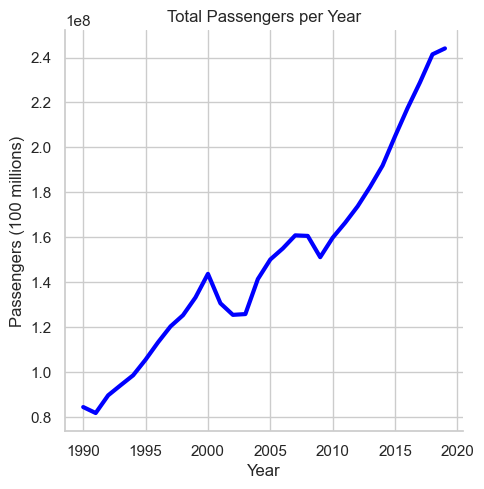

In [9]:
#grafico vuelos por anno
##Vemos que tiene tendencia ascendente
sns.set(style='whitegrid')

sns.relplot(x='Year', y='Total', data=df1_year, linewidth = 3, color='deepskyblue', kind='line')
plt.title('Total Flights per Year')
plt.ylabel('Flights number (millions)')
sns.relplot(x='Year',y='Total', data=pax_year, linewidth = 3, color='blue', kind='line')
plt.title('Total Passengers per Year')
plt.ylabel('Passengers (100 millions)')

#'Passengers'
#'Flights'


plt.show()

**PRIMERA HIPOTESIS:** La meta más popular es una capital europea.

In [10]:
#saco de estos archivos la ubicación y el nombre completo de los aereopuertos
airports = pd.read_csv('airports-code@public.csv', sep=';')
with open ('airports-code@public.geojson', 'r') as file:
    geo = json.load(file)
airports.head(3)

,Airport Code,Airport Name,City Name,Country Name,Country Code,Latitude,Longitude,World Area Code,City Name geo_name_id,Country Name geo_name_id,coordinates
0,YCB,Cambridge Bay,Cambridge Bay,Canada,CA,69.116667,-105.133333,906,\N,6251999.0,"69.116667, -105.133333"
1,YKD,Township Airport,Kincardine,Canada,CA,44.201389,-81.606667,906,\N,6251999.0,"44.201389, -81.606667"
2,UPF,Pforheim,Pforheim,Germany,DE,48.900000,8.700000,429,\N,2921044.0,"48.9, 8.7"


In [11]:
#quiero saber los aereopuertos con el mayor numero de pasajeros
aeropuertos_famosos_pax = paxd.groupby('destination_airport_name')['Total'].sum().sort_values(ascending=False).reset_index().head(9)

In [12]:
aeropuertos_famosos_pax

,destination_airport_name,Total
0,LHR,325944783
1,YYZ,255608042
2,NRT,253582314
3,FRA,173737221
4,CDG,153475282
5,MEX,148450819
6,CUN,148091011
7,AMS,125159774
8,YVR,120177103


In [13]:
#sacamos la ubicacion de aereopuertos famosos para pintarlos en el mapa
localizaciones = [(x['properties']['column_1'], x['geometry']['coordinates'][::-1]) for x in geo['features'] if x['properties']['column_1'] in aeropuertos_famosos_pax['destination_airport_name'].to_list()]

In [14]:
#ordenamos los valores para sacar la clasificación
localizaciones.sort(key=lambda x: aeropuertos_famosos_pax.loc[aeropuertos_famosos_pax.destination_airport_name==x[0],:].index)

In [15]:
#cambiamos el airport code por el airport name para que se entienda mejor
localizaciones = [(airports.loc[airports['Airport Code'] == x[0], 'Airport Name'].iloc[0], x[1]) for x in localizaciones]

**Como podemos observar la mayoria de pasajeros elige Europa como destino, en Asia, solo destaca Tokyo**

In [16]:
#creamos nuestro mapa con aereopuerto famosos pasajeros
map = folium.Map()
for pos, elemen in enumerate(localizaciones):
    folium.Marker(location=elemen[1], popup=elemen[0],
                    icon=folium.Icon(color='darkblue', icon=str(pos+1), prefix='fa')).add_to(map)
map

In [17]:
map.save('pax.html')

In [18]:
#Vamos a ver como ha evolucionado el numero de pasajeros con el pasar de los años en la top 3 aeropuertos
top_3 = paxd.loc[paxd.destination_airport_name.isin(['LHR', 'YYZ','NRT'])].groupby(['destination_airport_name', 'Year'])['Total'].sum().to_frame().reset_index()

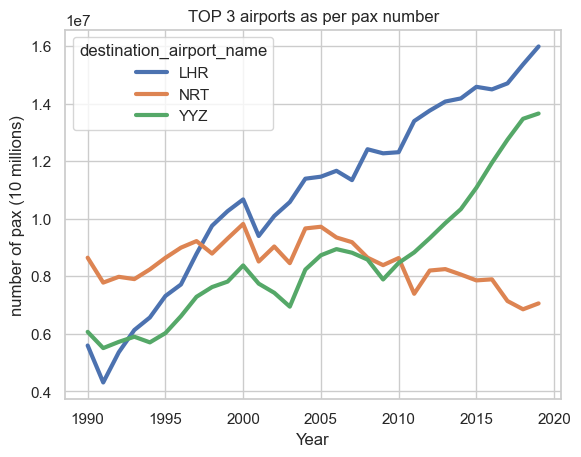

In [19]:
#London Heathrow, Toronto Pearson y Narita
sns.lineplot(data=top_3, x='Year', y='Total', hue='destination_airport_name', linewidth=3)
plt.ylabel('number of pax (10 millions)')
plt.title('TOP 3 airports as per pax number');

**SEGUNDA HIPOTESIS:** La mayor parte de los vuelos tiene como destino Europa y Asia.

In [20]:
#quiero saber los aeropuertos con el mayor numero de vuelos
aeropuertos_famosos_vuelos = df1.groupby('destination_airport_name')['Total'].sum().sort_values(ascending=False).reset_index().head(9)
aeropuertos_famosos_vuelos

,destination_airport_name,Total
0,YYZ,3953801
1,MEX,1635629
2,LHR,1546111
3,YUL,1503820
4,YVR,1496670
5,NRT,1300622
6,CUN,1171446
7,FRA,837470
8,NAS,830757


In [21]:
localizaciones = [(x['properties']['column_1'], x['geometry']['coordinates'][::-1]) for x in geo['features'] if x['properties']['column_1'] in aeropuertos_famosos_vuelos['destination_airport_name'].to_list()]

In [22]:
localizaciones.sort(key=lambda x: aeropuertos_famosos_vuelos.loc[aeropuertos_famosos_vuelos.destination_airport_name==x[0],:].index)

In [23]:
localizaciones = [(airports.loc[airports['Airport Code'] == x[0], 'Airport Name'].iloc[0], x[1]) for x in localizaciones]

**Como podemos observar en el mapa la mayor parte de los vuelos tiene como destino Sur America y Canada.**

In [24]:
#creamos nuestro mapa con aereopuerto famosos vuelos
map = folium.Map()
for pos, elemen in enumerate(localizaciones):
    folium.Marker(location=elemen[1], popup=elemen[0],
                    icon=folium.Icon(color='blue', icon=str(pos+1), prefix='fa')).add_to(map)
map

In [25]:
map.save('vuelos.html')

In [26]:
#Vamos a ver como ha evolucionado el numero de vuelos con el pasar de los años en la top 3 aeropuertos
top_3 = df1.loc[df1.destination_airport_name.isin(['YYZ', 'MEX','LHR'])].groupby(['destination_airport_name', 'Year'])['Total'].sum().to_frame().reset_index()

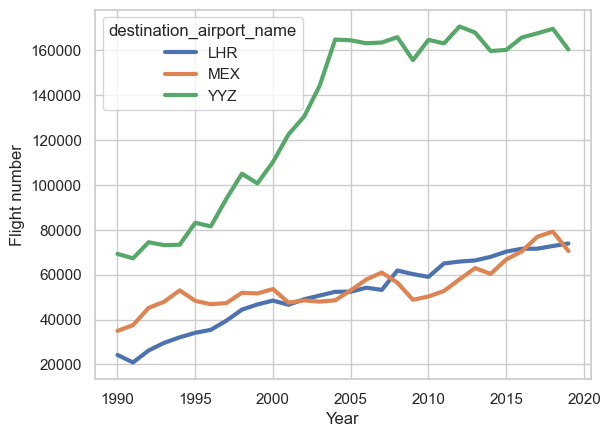

In [27]:
#Toronto Pearson International, Mexico city y London Heathrow
sns.lineplot(data=top_3, x='Year', y='Total', hue='destination_airport_name', linewidth=3)
plt.ylabel('Flight number');
#plt.title('TOP 3 airports as per number of flights');

**TERCERA HIPOTESIS:**
La estación del año con más frecuencia de vuelos es el verano.


In [28]:
#definimos las estaciones para sacar cuantos vuelos hay en cada una de ellas
departures_by_month = df1.groupby(["Year", "Month"])["Total"].sum().reset_index()
departures_by_month = departures_by_month.pivot(index="Year", columns="Month", values="Total")

In [29]:
#inserto en las columnas todos los meses con su estación
departures_by_season = pd.DataFrame()
departures_by_season["Winter"] = departures_by_month[12] + departures_by_month[1] + departures_by_month[2]
departures_by_season["Spring"] = departures_by_month[3] + departures_by_month[4] + departures_by_month[5]
departures_by_season["Summer"] = departures_by_month[6] + departures_by_month[7] + departures_by_month[8]
departures_by_season["Autumn"] = departures_by_month[9] + departures_by_month[10] + departures_by_month[11]
departures_by_season_sum = departures_by_season.sum(axis=0)
departures_by_season.head()

,Winter,Spring,Summer,Autumn
Year,,,,
1990,162678,167600,180433,172688
1991,167370,167699,188965,177809
1992,186901,191292,210022,196752
1993,199826,202449,216784,201317
1994,206373,209946,218978,209463


**Efectivamente el verano destaca como epoca favorita por el numero de vuelos.**

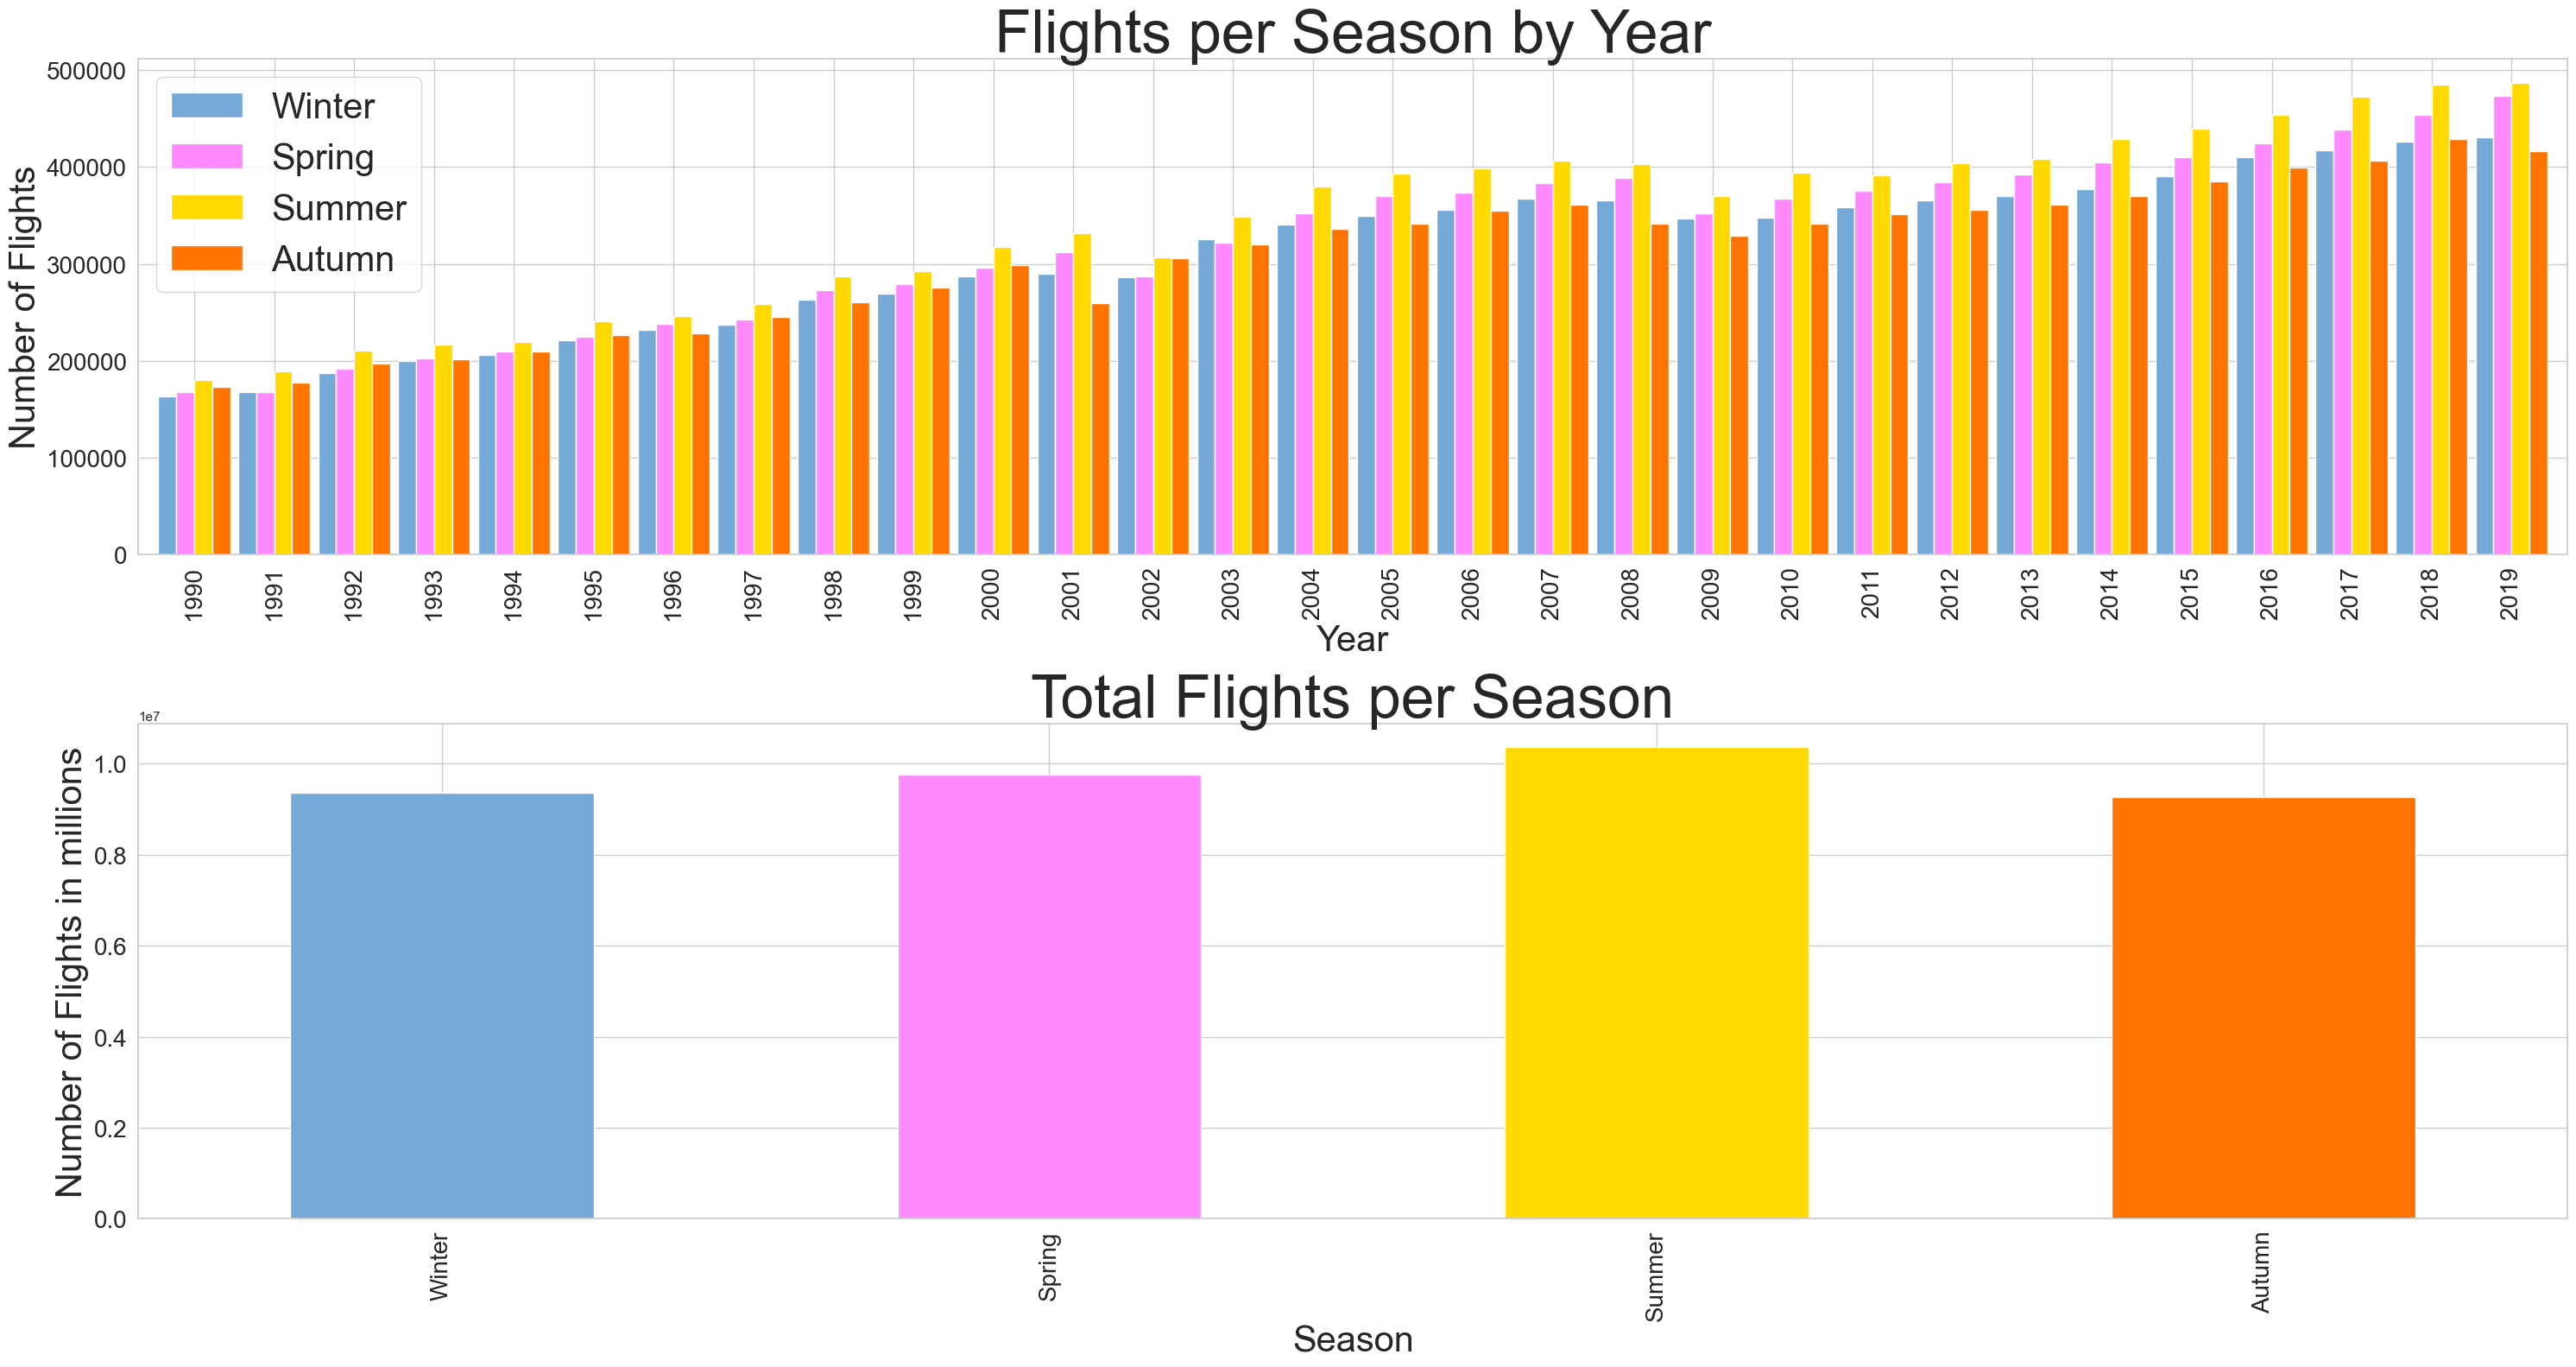

In [30]:
season_colors = ["#75aad8", "#ff89ff", "#ffd900", "#ff7400"]
departures_by_season_sum = departures_by_season.sum(axis=0)
fig, ax = plt.subplots(2, 1, figsize=(30, 16))
departures_by_season.plot(kind="bar", width=0.9, stacked=False, color=season_colors, ax=ax[0], fontsize=20, title="Flights per Season by Year", xlabel="Year", ylabel="Number of Flights")
departures_by_season_sum.plot(kind="bar", color=season_colors, ax=ax[1], title="Total Flights per Season", fontsize=20, xlabel="Season", ylabel="Number of Flights (in tens of millions)")
ax[0].set_title('Flights per Season by Year',fontsize=50)
ax[1].set_title('Total Flights per Season',fontsize=50)
ax[0].set_xlabel("Year",fontsize=30)
ax[0].set_ylabel("Number of Flights", fontsize=30)
ax[1].set_xlabel("Season",fontsize=30)
ax[1].set_ylabel("Number of Flights in millions", fontsize=30)
ax[0].legend(fontsize=30)
fig.tight_layout()   
plt.show()

**CONCLUSIONES**


Analizando los datos podemos identificar algunos aeropuertos para abrir la nueva oficina y así como el momento más oportuno para hacerlo:

1. **Toronto Pearson Airport**

2. **London Heathrow Airport**

3. **Tokyo Narita Airport**


**En Primavera** es el mejor momento para abrir como hay mucho más trafico en primavera y verano.

In [31]:
#lo visualizamos con un mapa
solution = df1.loc[df1.destination_airport_name.isin(['YYZ', 'LHR','NRT'])].groupby(['destination_airport_name', 'Year'])['Total'].sum().to_frame().reset_index()

In [32]:
localizaciones = [(x['properties']['column_1'], x['geometry']['coordinates'][::-1]) for x in geo['features'] if x['properties']['column_1'] in solution['destination_airport_name'].to_list()]

In [33]:
localizaciones = [(airports.loc[airports['Airport Code'] == x[0], 'Airport Name'].iloc[0], x[1]) for x in localizaciones]

In [34]:
map = folium.Map()
for pos, elemen in enumerate(localizaciones):
    folium.Marker(location=elemen[1], popup=elemen[0],
                    icon=folium.Icon(color='blue', icon=str(pos+1), prefix='fa')).add_to(map)
map